In [1]:
import numpy as np
import natsort
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import drive
from glob import glob


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
class image_processing():
    def __init__(self, path1, path2):
        self.rgb_img_path = path1
        self.patch_img_path = path2
        self.crop_margin(self.rgb_img_path)

    def crop_margin(self,path):
        file_count = 0
        for file_path in path:
            file_count += 1
            #print(file_count,"번 째 사진 전처리중. . .")
            img = cv2.imread(file_path)
            #print("여백 제거 전 : ", img.shape)
            self.crop_rgb_img = img[:,25:-25,:]
            #print("여백 제거 후 : ", self.crop_rgb_img.shape)

            self. make_patch_img(self.crop_rgb_img, file_count)
            #print("")


        print(file_count,"장 전처리 완료.")


    def make_patch_img(self, img, file_count):

        print(img.shape)
        num_col_patch = img.shape[1] // 1024    # 겹쳐지지 않은 열 패치 개수
        num_row_patch = img.shape[0] // 1024    # 겹쳐지지 않은 행 패치 개수 

        over_col_patch = (1024 * (num_col_patch + 1)) - img.shape[1] #겹쳐지는 가로 길이
        over_row_patch = (1024 * (num_row_patch + 1)) - img.shape[0] #겹쳐지는 세로 길이

        plt.figure(figsize =(12,12))
        figure_cnt = 0
        file_count2 = 0
        for i in range(num_row_patch + 1):
            for j in range(num_col_patch + 1):
                figure_cnt += 1
                file_count2 += 1

                if i == num_row_patch and j == num_col_patch:
                    patch_img = img[(1024 * num_row_patch) - over_row_patch :, (1024 * num_col_patch) - over_col_patch :, :]  
                    save_path = self.patch_img_path + f'/img{file_count}_{file_count2}.png'
                    # cv2.imwrite(save_path, patch_img)  


                elif j == num_col_patch:
                    patch_img = img[i*1024 : i*1024 + 1024, (1024 * num_col_patch) - over_col_patch :, :]  
                    save_path = self.patch_img_path + f'/img{file_count}_{file_count2}.png'
                    # cv2.imwrite(save_path, patch_img)                                

                elif i == num_row_patch:
                    patch_img = img[(1024 * num_row_patch) - over_row_patch : , j*1024 : j*1024+1024  , : ]
                    save_path = self.patch_img_path + f'/img{file_count}_{file_count2}.png'                   
                    # cv2.imwrite(save_path, patch_img)   

                else:
                    patch_img = img[ i*1024 : i*1024 + 1024,    j*1024 :  j*1024+1024  ,:]
                    save_path = self.patch_img_path + f'/img{file_count}_{file_count2}.png'
                    # cv2.imwrite(save_path, patch_img)     
                
                plt.subplot(6,6,figure_cnt)
                plt.imshow(patch_img)
        plt.show()

In [6]:
dir = "/asdf/asdf/asdf/asd.png"

In [ ]:
run = image_processing()

In [7]:
def sortlist(filelist):
    filelist = natsort.natsorted(filelist)
    return filelist

In [ ]:
def confirm_patch(path, img_num):
    file_list = os.listdir(path)

    file_list = sortlist(file_list)

    plt.figure(figsize =(12,12))
    for i in range(25):
        img_path = path + '/' + file_list[(img_num-1)*25 + i]
        img = cv2.imread(img_path)
        plt.subplot(5,5,i+1)
        plt.imshow(img)
    plt.show()

In [10]:
train_dir_path = '/content/drive/MyDrive/Cloud_data/cloud_train/'

train_file_path = os.path.join(train_dir_path,'train_clouds_data/png2')

train_rgb_file_list = glob(os.path.join(train_file_path,"*RGB*png"))

train_rgb_file_list = sortlist(train_rgb_file_list)

(5400, 5965, 3)


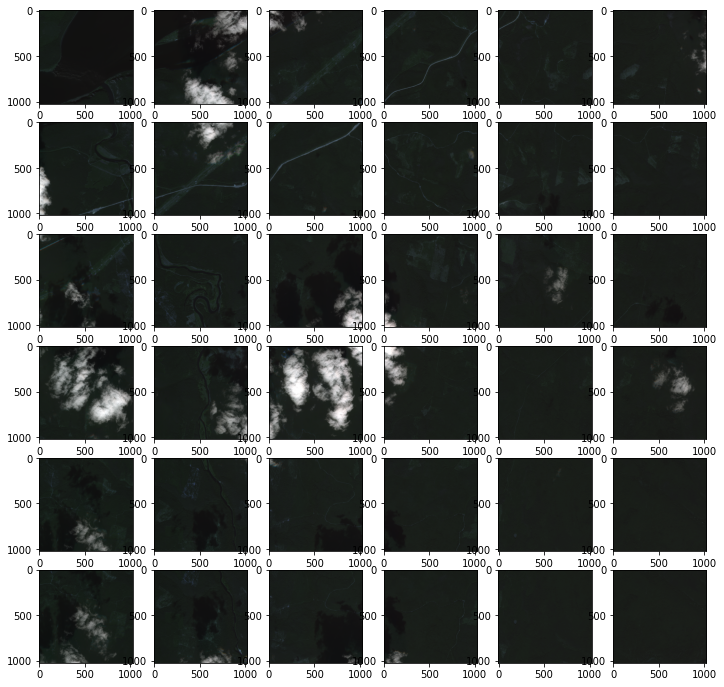

(5900, 5965, 3)


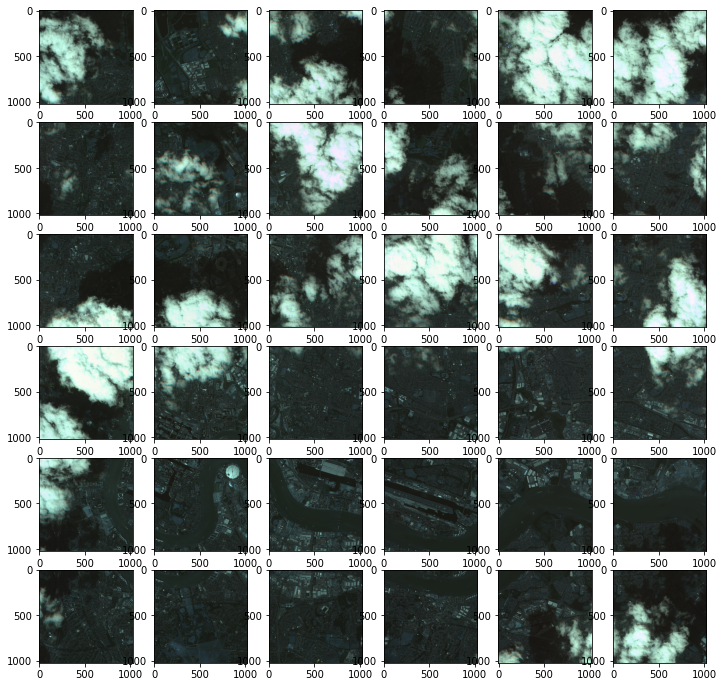

(5660, 5965, 3)


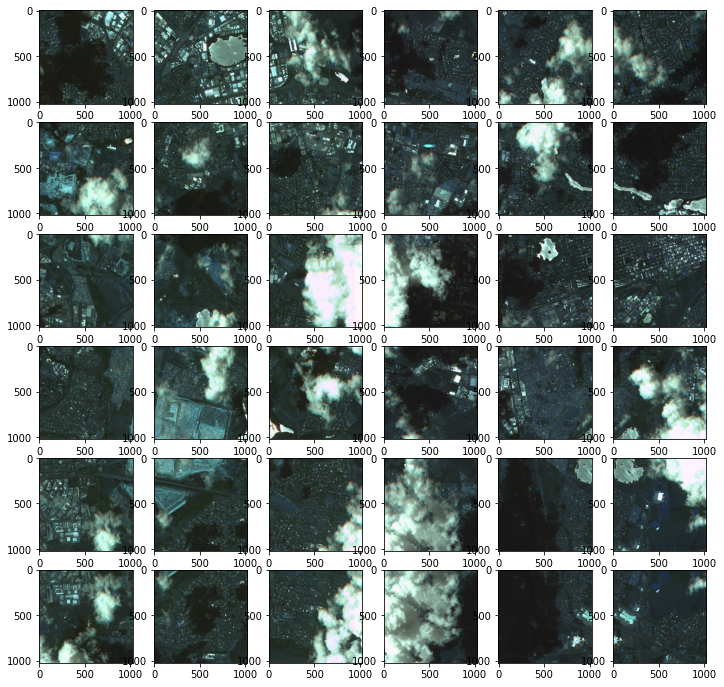

3 장 전처리 완료.


In [63]:
run_train_img = image_processing(train_rgb_file_list, dir)